In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy.io as spio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [3]:
sns.set_style('ticks')
sns.set_context('notebook')

In [4]:
def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    
    from: `StackOverflow <http://stackoverflow.com/questions/7008608/scipy-io-loadmat-nested-structures-i-e-dictionaries>`_
    '''
    data = spio.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return data      

def todict(matobj):
    '''
    A recursive function which constructs from matobjects nested dictionaries
    '''
    dict = {}
    for strg in matobj._fieldnames:
        elem = matobj.__dict__[strg]
        if isinstance(elem, spio.matlab.mio5_params.mat_struct):
            dict[strg] = _todict(elem)
        else:
            dict[strg] = elem
    return dict

In [60]:
mat = loadmat("/home/julia/data/reversal_active/hf2_UUU140222a_alldata_new2.mat")

In [61]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'lick_data', 'parsed', 'sorted', 'data', 'session'])

## Lick data

In [62]:
trial_keys = list(todict(mat["lick_data"][0]).keys())
print(trial_keys)

['start', 'end', 'odor_start', 'type', 'odor', 'num', 'licks', 'gpmt', 'rpmt', 'emg', 'body', 'neck', 'performance', 'iti_start']


In [63]:
trials = [todict(mat["lick_data"][i]) for i in range(len(mat["lick_data"]))]

In [68]:
t=100
print(trials[t]['type'])
#print("start/end:",trials[t]["end"]-trials[t]["start"])
#print("licks:",len(trials[t]["licks"]))
#print("body:",len(trials[t]["body"]))
#print("neck:",len(trials[t]["neck"]))
#print("emg:",len(trials[t]["emg"]))
#print("gpmt:",len(trials[t]["gpmt"]))
#print("rpmt:",len(trials[t]["rpmt"]))

#print(len(trials[t]["body"])-len(trials[t]["licks"]))
#print(len(trials[t]["licks"])-len(trials[t]["gpmt"]))
print(trials[t]["iti_start"])
print(trials[t]["odor_start"])
#print(trials[t]["iti_start"]-trials[t]["odor_start"])

go
7603
3790


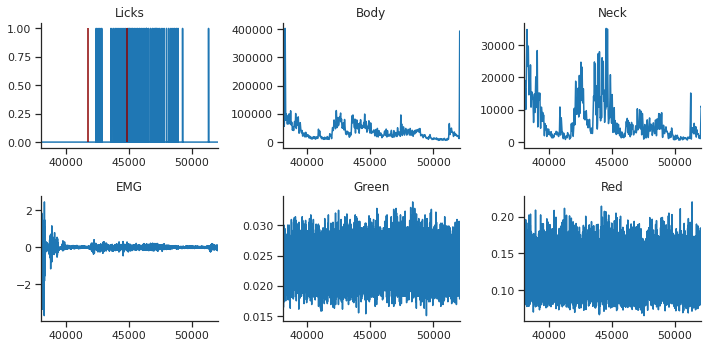

In [201]:
t=0
x = np.arange(trials[t]["start"],trials[t]["end"],1)
xlim = [trials[t]["start"],trials[t]["end"]]

fig = plt.figure(figsize=(10,5))

fig.add_subplot(2,3,1)
plt.plot(x, trials[t]['licks'][:len(x)], zorder=1)
plt.xlim(xlim)
plt.title("Licks")
plt.vlines([trials[t]["start"]+trials[t]["odor_start"],trials[t]["start"]+trials[t]["iti_start"]], 
           0,1, color="darkred", zorder=2)
sns.despine()

fig.add_subplot(2,3,2)
plt.plot(x,trials[t]['body'][:len(x)])
plt.xlim(xlim)
plt.title("Body")
sns.despine()

fig.add_subplot(2,3,3)
plt.plot(x,trials[t]['neck'][:len(x)])
plt.xlim(xlim)
plt.title("Neck")
sns.despine()

fig.add_subplot(2,3,4)
plt.plot(x,trials[t]['emg'][:len(x)])
plt.xlim(xlim)
plt.title("EMG")
sns.despine()

fig.add_subplot(2,3,5)
plt.plot(x,trials[t]['gpmt'][:len(x)])
plt.xlim(xlim)
plt.title("Green")
sns.despine()

fig.add_subplot(2,3,6)
plt.plot(x,trials[t]['rpmt'][:len(x)])
plt.xlim(xlim)
plt.title("Red")
sns.despine()

plt.tight_layout()

### Distributions across all datasets

In [5]:
datasets = glob("/home/julia/data/reversal_active/*.mat")

In [25]:
waits_0 = []
waits_1 = []
gos_0 = []
gos_1 = []
nogos_0 = []
nogos_1 = []

for d in datasets:
    try:
        mat = loadmat(d)
        trials = [todict(mat["lick_data"][i]) for i in range(len(mat["lick_data"]))]
        for t in range(len(trials)):
            if trials[t]["type"] == "wait":
                if trials[t]["performance"] == 1:
                    waits_1.append(trials[t]["iti_start"]-trials[t]["odor_start"])
                elif trials[t]["performance"] == 0:
                    waits_0.append(trials[t]["iti_start"]-trials[t]["odor_start"])
            elif trials[t]["type"] == "go":
                if trials[t]["performance"] == 1:
                    gos_1.append(trials[t]["iti_start"]-trials[t]["odor_start"])
                elif trials[t]["performance"] == 0:
                    gos_0.append(trials[t]["iti_start"]-trials[t]["odor_start"])
            elif trials[t]["type"] == "nogo":
                if trials[t]["performance"] == 1:
                    nogos_1.append(trials[t]["iti_start"]-trials[t]["odor_start"])
                elif trials[t]["performance"] == 0:
                    nogos_0.append(trials[t]["iti_start"]-trials[t]["odor_start"])
    except:
        print(d)

/home/julia/data/reversal_active/hf2_UUU140219a_alldata_new2.mat
/home/julia/data/reversal_active/hf2_TAY140228a_alldata_new2.mat
/home/julia/data/reversal_active/hf2_TAY140221a_alldata_new2.mat
/home/julia/data/reversal_active/hf2_YOU140225a_alldata_new2.mat
/home/julia/data/reversal_active/hf2_SHA140219a_alldata_new2.mat


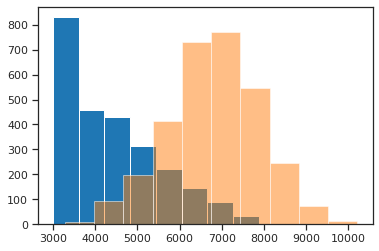

In [29]:
plt.hist(waits_0);
plt.hist(waits_1, alpha=0.5);

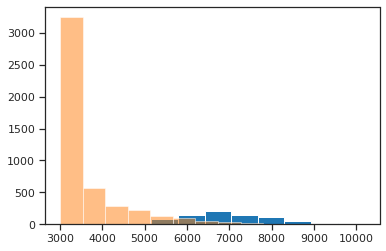

In [35]:
plt.hist(gos_0);
plt.hist(gos_1, alpha=0.5);

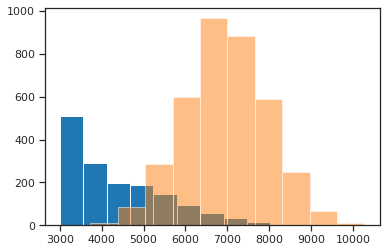

In [32]:
plt.hist(nogos_0);
plt.hist(nogos_1, alpha=0.5);

In [43]:
trials[2]["iti_start"] - trials[2]["odor_start"]

6709

3846

In [42]:
trials[2]["performance"]

1